In [65]:
# Task 1

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from itertools import combinations
from scipy import stats


# функция преобразования первичного листа в датафрейм
def get_DF_matrix(x):
    x1 = []
    x2 = []
    x3 = []
    x4 = []

    for l in range(len(x)):
        x1.append(x[l][0])
        x2.append(x[l][1])
        x3.append(x[l][2])
        x4.append(x[l][3])

    df = pd.DataFrame({
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4
    })
    
    return df


# функция получения суммы квадратов
def sum_of_squares(samples):
    return((samples - samples.mean())**2).sum()


# функция получения коэффициента детерминации
def r2_score(sample):
    ones = np.ones((sample.shape[0], 1))
    sample = np.hstack((ones, sample))
    XTX = sample.T.dot(sample)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(sample.T).dot(y)
    z = sample.dot(b)

    return 1 - ((y - z)**2).sum() / sum_of_squares(y)


# функция, которая выдает нам комбинацию факторов с наибольшим коэффициентом детерминации
def biggest_r2(x, n):
    dic = {}

    for i in combinations(list(get_DF_matrix(x).columns), n):
        dic[i] = r2_score(get_DF_matrix(x)[list(i)])

    print(f'Biggest combination: {max(dic, key=dic.get)}')


# функция получения значения F-теста
def F_test(r2, n, m):
    k1 = m
    k2 = n - m - 1
    
    return (r2 / k1) / ((1 - r2) / k2)


# функция, которая проверяет факторы на значимость их зависимости
def scoring(r2, n, m, alpha):  
    k1 = m
    k2 = n - m - 1
    F_test(r2, n, m)
    t = stats.f.ppf(1 - alpha, k1, k2)
    
    if F_test(r2, n, m) > stats.f.ppf(1 - alpha, k1, k2):
        return print('Зависимость факторов значима')
    else:
        return print('Зависимость факторов незначима')

    
#--------------------------------------------------------------------------------------------------------------------------

# Вводные массивы X и Y

x = np.asarray([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

y = np.asarray([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])


# получим самые зависимые факторы
biggest_r2(x, 2)


# проверим их значимость
scoring(r2_score(get_DF_matrix(x)[['x1', 'x3']]), x.shape[0], x.shape[1], 0.05)


Biggest combination: ('x1', 'x3')
Зависимость факторов незначима


Зависимость факторов значима


y    0.114693
dtype: float64

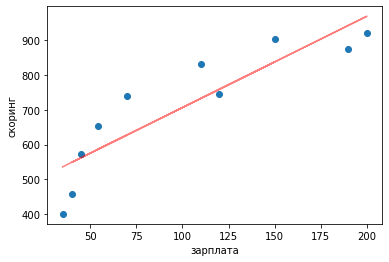

In [99]:
# Task 2

import statsmodels.api as sm

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2) # 2.62
b0 = np.mean(y) - b1 * np.mean(x) # 444.18

ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)
plt.xlabel('зарплата')
plt.ylabel('скоринг')

dfx = pd.DataFrame({
    'x': x
})

dfy = pd.DataFrame({
    'y': y
})



r2_score(dfx) # 0.7876

scoring(r2_score(dfx), dfx.shape[0], dfx.shape[1], 0.05) # Зависимость факторов значима

yx = b0 + b1 * dfx
yx = yx.rename({'x': 'y'}, axis=1)

# средняя ошибка аппроксимации
(abs(dfy - yx) / dfy).sum() / dfx.shape[0] # 0.1147, довольно высокое значение